# Import libraries

In [1]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers.experimental.preprocessing import Normalization
import matplotlib.pyplot as plt



In [2]:

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [6]:
dataset, info = preprocessing.text_dataset_from_directory('/content/drive/MyDrive/MasterThesis/Datasets/Offensive2020/test')
# train_dataset, test_dataset = dataset['train'], dataset['test']

dataset.element_spec

# BUFFER_SIZE = 10000
# BATCH_SIZE = 64

# raw_train_ds = preprocessing.text_dataset_from_directory(
#    '/content/drive/MyDrive/MasterThesis/Datasets/Offensive2020/train',
#     batch_size=BATCH_SIZE,
#     )

# raw_test_ds = preprocessing.text_dataset_from_directory(
#     '/content/drive/MyDrive/MasterThesis/Datasets/Offensive2020/test',
#      batch_size=BATCH_SIZE)

# raw_val_ds = preprocessing.text_dataset_from_directory(
#     '/content/drive/MyDrive/MasterThesis/Datasets/Offensive2020/dev',
#      batch_size=BATCH_SIZE)

Found 2000 files belonging to 2 classes.


ValueError: ignored

In [ ]:
# raw_train_ds = raw_train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
# raw_test_ds = raw_test_ds.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
for tweet_batch, label_batch in raw_val_ds.take(1):
  for i in range(5):
    print("tweet: ", tweet_batch[i].numpy().decode('utf-8').strip())
    print("Label: ", label_batch[i].numpy())

tweet:  منتظرة ميلادج يا صاحبة القلب اللطيف, يا أجمل من قرّب ميلادها،يالي قرب ميلادج يا صُدفة أختلفت عن باقي الصُدف، يا نعمةجتني من سابع سّماء،يا أجمَل اقدارالعمر واقداري ، يا نعمه مدري كيف اشكرها،ياللي من عرفتج ماندمت اني عرفتج ارجع اشكر كل لحظه فيج جمعتني🧡<LF>@USER	NOT_OFF	NOT_HS
Label:  1
tweet:  @USER شهور العده دي للنسوان اللي بتصبغ شعرها احمر يا فتك يا ابو شعر احمر	OFF	NOT_HS
Label:  0
tweet:  RT @USER: يا اصحاب يا اغراب خلاص كتبنا الكتاب شوفوا حبيبة قلبى URL	NOT_OFF	NOT_HS
Label:  1
tweet:  RT @USER: #الاتحاد_النصر وين هياطكم يا جمهور النصر يا صغير الرياض	OFF	HS
Label:  0
tweet:  RT @USER: @USER يا هلا يا بو بداح يا صباح الخيرات يا الغالي 💐	NOT_OFF	NOT_HS
Label:  1


In [ ]:
import string
import re
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    # stripped_html = tf.strings.regex_replace(lowercase, "<LF>", " ")
    stripped_html = tf.strings.regex_replace(input_data, "[a-zA-Z]", " ")
    
    return tf.strings.regex_replace(
        stripped_html, "[%s]" % re.escape(string.punctuation), ""
    )
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=10000,
    output_mode='int'
    # output_sequence_length=MAX_SEQUENCE_LENGTH
    )
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda text, labels: text)
vectorize_layer.adapt(train_text)


In [ ]:
# layer = preprocessing.Normalization()
# layer.adapt(train_text)
# normalized_data = layer(train_text)

In [ ]:
vocab = np.array(vectorize_layer.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'يا', 'و', 'من', 'الله', 'في', 'ما', 'رب', 'لا', 'كل',
       '،', 'على', 'انت', 'اللهم', 'انا', 'اللي', 'ولا', 'والله', 'قلبي'],
      dtype='<U53')

In [ ]:
vectorize_layer


In [ ]:
encoded_example = vectorize_layer(tweet_batch)[:5].numpy()
encoded_example

array([[   1,    1,    2, 2270,  173,    1,    2,  111,    4,    1,    1,
        4937,    1,    2,    1,    1,   25, 1315,    1,    2,    1,    4,
        5235,    1,    1,    1,    1,   11,    2, 4619,  615,  179,    1,
           4,    1,    1,  122,    1,  691,    1,   10, 2202, 7929,    1,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1930,    1,   45,    1,   16,    1, 8413, 2496,    2,    1,    2,
          44, 3710, 2496,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2, 2067,    2,    1,  133,    1, 5801, 1929,  535,  588,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0

In [ ]:
for n in range(5):
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Round-trip:  [UNK] [UNK] يا صاحبة القلب [UNK] يا أجمل من [UNK] [UNK] قرب [UNK] يا [UNK] [UNK] عن باقي [UNK] يا [UNK] من سابع [UNK] [UNK] [UNK] [UNK] ، يا نعمه مدري كيف [UNK] من [UNK] [UNK] اني [UNK] ارجع [UNK] كل لحظه فيج [UNK]         

Round-trip:  شهور [UNK] دي [UNK] اللي [UNK] شعرها احمر يا [UNK] يا ابو شعر احمر                                       

Round-trip:  يا اصحاب يا [UNK] خلاص [UNK] الكتاب شوفوا حبيبة قلبى                                           

Round-trip:  الاتحادالنصر وين [UNK] يا جمهور النصر يا صغير الرياض                                            

Round-trip:  يا هلا يا بو [UNK] يا صباح الخيرات يا الغالي [UNK]                                          



# First model with one RNN layer - Bidirectional

In [ ]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [ ]:
# predict on a sample text without padding.

sample_text = ('  بنهايه ضحكني يوم قعد يعزز للاستاذ الله عليك يا استاز الله عليك يا فنان'
               'وانت يا لص يا متصهين لا تمثل المجتمع الكوردي')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[0.00227653]


In [ ]:
# predict on a sample text with padding

padding = " " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

[0.00227653]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(raw_train_ds, epochs=10,
                    validation_data=raw_val_ds, 
                    validation_steps=30)

Epoch 1/10
110/110 [==============================] - 431s 4s/step - loss: 0.6369 - accuracy: 0.2943 - val_loss: 0.5129 - val_accuracy: 0.8110
Epoch 2/10
110/110 [==============================] - 21s 187ms/step - loss: 0.5090 - accuracy: 0.7973
Epoch 3/10
110/110 [==============================] - 20s 182ms/step - loss: 0.4598 - accuracy: 0.7986
Epoch 4/10
110/110 [==============================] - 21s 187ms/step - loss: 0.3745 - accuracy: 0.8410
Epoch 5/10
110/110 [==============================] - 20s 186ms/step - loss: 0.2564 - accuracy: 0.9163
Epoch 6/10
110/110 [==============================] - 20s 184ms/step - loss: 0.1711 - accuracy: 0.9460
Epoch 7/10
110/110 [==============================] - 20s 179ms/step - loss: 0.1102 - accuracy: 0.9693
Epoch 8/10
110/110 [==============================] - 20s 177ms/step - loss: 0.0800 - accuracy: 0.9796
Epoch 9/10
110/110 [==============================] - 21s 187ms/step - loss: 0.0578 - accuracy: 0.9854
Epoch 10/10
110/110 [============

In [ ]:
test_loss, test_acc = model.evaluate(raw_test_ds)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

32/32 [==============================] - 630s 20s/step - loss: 0.4780 - accuracy: 0.8750
Test Loss: 0.4779636859893799
Test Accuracy: 0.875


(0.0, 0.6427411759272218)

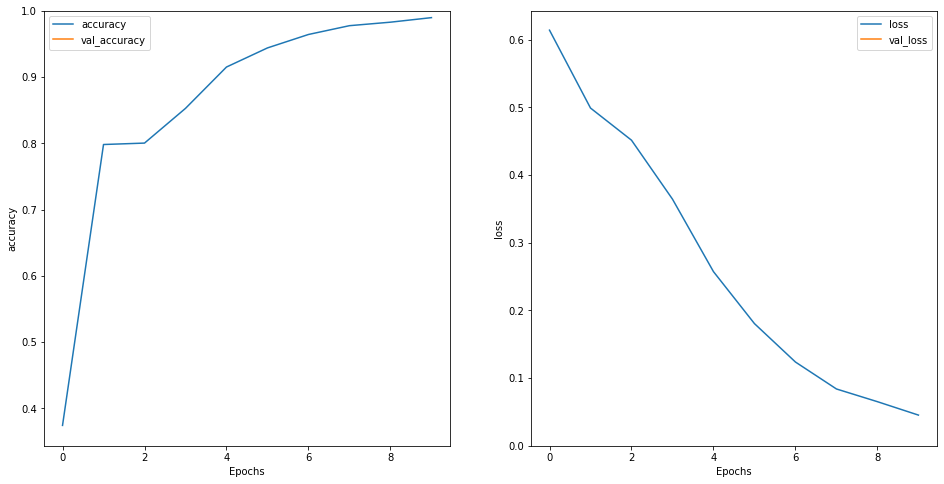

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

# import matplotlib.pyplot as plt
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss=history.history['loss']
# val_loss=history.history['val_loss']

# #epochs_range = range(22)

# plt.figure(figsize=(15, 15))
# plt.subplot(1, 2, 1)
# plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [ ]:
sample_text = ('  بنهايه ضحكني يوم قعد يعزز للاستاذ الله عليك يا استاز الله عليك يا فنان'
               'وانت يا لص يا متصهين لا تمثل المجتمع الكوردي')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[-0.67746985]


Second model with two RNN layer - Bidirectional

In [ ]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(len(vectorize_layer.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(raw_train_ds, epochs=10,
                    validation_data=raw_val_ds,
                    validation_steps=30)

Epoch 1/10
110/110 [==============================] - 32s 291ms/step - loss: 0.6176 - accuracy: 0.3700 - val_loss: 0.4990 - val_accuracy: 0.8200
Epoch 2/10
110/110 [==============================] - 26s 236ms/step - loss: 0.5125 - accuracy: 0.7931
Epoch 3/10
110/110 [==============================] - 26s 239ms/step - loss: 0.4578 - accuracy: 0.8001
Epoch 4/10
110/110 [==============================] - 26s 233ms/step - loss: 0.3574 - accuracy: 0.8560
Epoch 5/10
110/110 [==============================] - 26s 239ms/step - loss: 0.2402 - accuracy: 0.9256
Epoch 6/10
110/110 [==============================] - 26s 236ms/step - loss: 0.1455 - accuracy: 0.9577
Epoch 7/10
110/110 [==============================] - 26s 234ms/step - loss: 0.0922 - accuracy: 0.9760
Epoch 8/10
110/110 [==============================] - 26s 233ms/step - loss: 0.0613 - accuracy: 0.9846
Epoch 9/10
110/110 [==============================] - 27s 242ms/step - loss: 0.0435 - accuracy: 0.9891
Epoch 10/10
110/110 [==========

In [ ]:
test_loss, test_acc = model.evaluate(raw_test_ds)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

32/32 [==============================] - 3s 96ms/step - loss: 0.6364 - accuracy: 0.8680
Test Loss: 0.6364173293113708
Test Accuracy: 0.8679999709129333


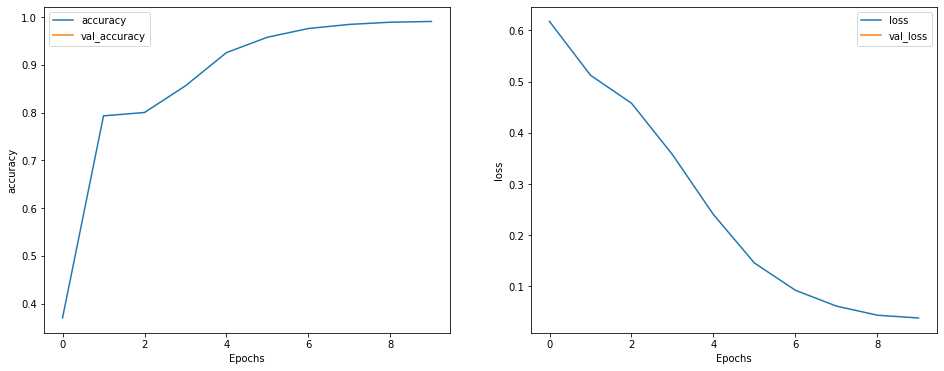

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(history, 'loss')